<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
from scipy import stats

In [2]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

Cloning into '19ma573ZiyueNie'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 529 (delta 7), reused 0 (delta 0), pack-reused 499
Receiving objects: 100% (529/529), 814.27 KiB | 8.66 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [3]:
cd 19ma573ZiyueNie/src/


/content/19ma573ZiyueNie/src


In [4]:
'''======
Read data
========='''
#Read two-column data
#columns are date,adjusted closing price
Data_A = pd.read_csv('FB year 1.csv')

print('>>>>>> data')
print(Data_A)

>>>>>> data
           Date   Adj Close
0      2017/9/8  170.949997
1     2017/9/11  173.509995
2     2017/9/12  172.960007
3     2017/9/13  173.050003
4     2017/9/14  170.960007
5     2017/9/15  171.639999
6     2017/9/18  170.009995
7     2017/9/19  172.520004
8     2017/9/20  172.169998
9     2017/9/21  171.110001
10    2017/9/22  170.539993
11    2017/9/25  162.869995
12    2017/9/26  164.210007
13    2017/9/27  167.679993
14    2017/9/28  168.729996
15    2017/9/29  170.869995
16    2017/10/2  169.470001
17    2017/10/3  169.960007
18    2017/10/4  168.419998
19    2017/10/5  171.240005
20    2017/10/6  172.229996
21    2017/10/9  172.500000
22   2017/10/10  171.589996
23   2017/10/11  172.740005
24   2017/10/12  172.550003
25   2017/10/13  173.740005
26   2017/10/16  174.520004
27   2017/10/17  176.110001
28   2017/10/18  176.029999
29   2017/10/19  174.559998
..          ...         ...
222   2018/7/27  174.889999
223   2018/7/30  171.059998
224   2018/7/31  172.580002
225    2

Problem3

In [5]:
log_return=[]
price = Data_A['Adj Close']
log_price=np.log(price)
for i in range(len(log_price)-1):
  log_return.append(log_price[i+1]-log_price[i])
print(log_return)


[0.014864107260478043, -0.003174811434114133, 0.0005201930547000799, -0.01215093546124102, 0.003969602341034495, -0.009542024857574383, 0.01465596552575743, -0.002030845793404623, -0.0061757187838820116, -0.003336798120258777, -0.046017526381676, 0.008193833245949023, 0.020911220254405727, 0.006242421117239161, 0.01260322369443756, -0.008227078292139645, 0.0028872305267420018, -0.009102308705999818, 0.016605262748758065, 0.005764659147367013, 0.0015664668485175781, -0.0052893494852668255, 0.006679715811226394, -0.001100535867097463, 0.00687289068013186, 0.004479413565008805, 0.009069434309845192, -0.00045437610823206853, -0.008385918749648447, 0.002403148190980531, -0.021430376819148833, 0.0030897450131064375, -0.007009356784753784, 0.00017582861477727363, 0.04161169490898864, 0.01112514619069227, 0.0010557776308974809, 0.014336405589220114, -0.020687755775675498, 0.0, 0.006962071140514503, 0.00044393763807715203, -0.003835373389665442, -0.0014490054325717594, -0.004695871646340777, 0.

In [6]:
mean=np.mean(log_return)
print(mean)
std=np.std(log_return)
print(std)


-0.00018874729878946237
0.021689253001153853


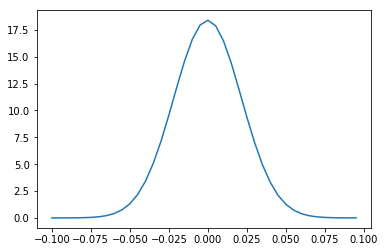

In [7]:
x=np.arange(-0.1, 0.1, 0.005)
y=stats.norm.pdf(x, -0.000188747, 0.021689253)
plt.plot(x, y)


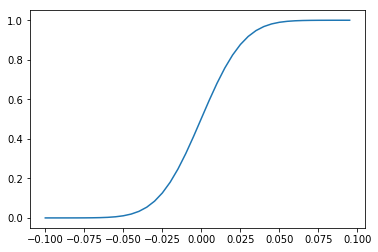

In [8]:

x = np.arange(-0.1, 0.1, 0.005)

y = stats.norm.cdf(x, -0.000188747, 0.021689253)

plt.plot(x, y)

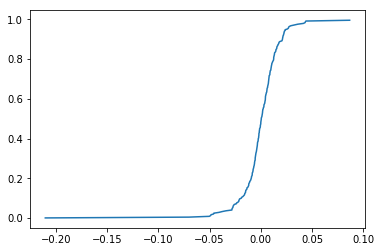

In [9]:
sorted_ = np.sort(log_return)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

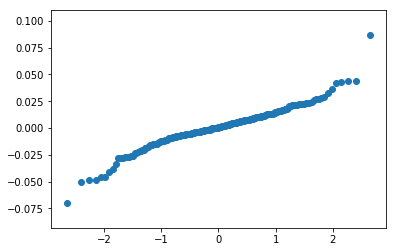

In [10]:
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)

QQ plot for normal distribution 


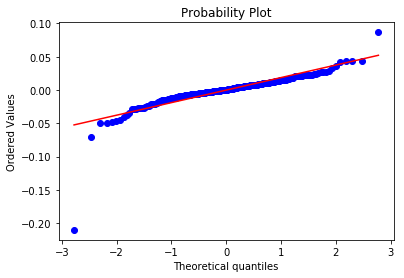

In [11]:
stats.probplot(log_return, dist="norm", plot=plt)
print('QQ plot for normal distribution ')
plt.show()

Problem4

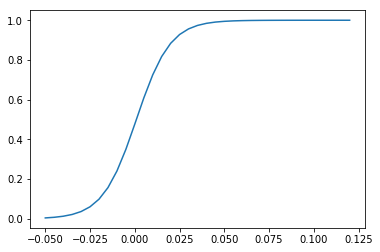

In [12]:
x = np.arange(-0.05, 0.125, 0.005)

y = stats.logistic.cdf(x, 0.0008577403, 0.0094384714)

plt.plot(x, y)

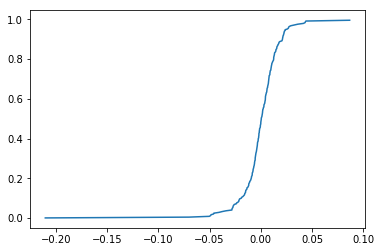

In [13]:
sorted_ = np.sort(log_return)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

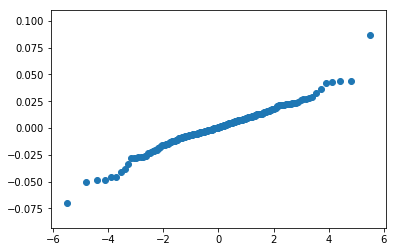

In [14]:
x_label = stats.logistic.ppf(yvals)
plt.scatter(x_label, sorted_)

QQ plot for logistic distribution


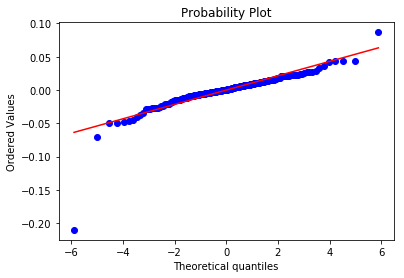

In [15]:
stats.probplot(log_return, dist="logistic", plot=plt)
print('QQ plot for logistic distribution')
plt.show()

problem 7

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


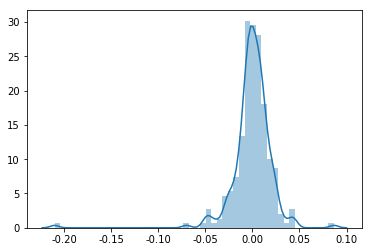

In [16]:
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
sns.distplot(log_return)
plt.show()

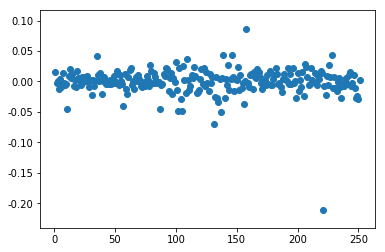

In [17]:
x=np.linspace(1,251,251)
y=log_return
plt.scatter(x,y)

In [18]:
out=log_return-np.mean(log_return)
sort_out=np.sort(out)
for i in [0,1,2,248,249,250]:
  print(sort_out[i])

-0.21004995392562012
-0.0699084338679984
-0.050033135736112254
0.043720549493333795
0.044224721089296405
0.08692873881542594


In [19]:
x1=np.mean(log_return)-0.21004995392562012
y1 = stats.logistic.cdf(x1, 0.0008577403, 0.0094384714)
print(y1)
x2=np.mean(log_return)+0.08692873881542594
y2 = 1-stats.logistic.cdf(x2, 0.0008577403, 0.0094384714)
print(y2)
x3=np.mean(log_return)-0.0699084338679984
y3 = stats.logistic.cdf(x3, 0.0008577403, 0.0094384714)
print(y3)

1.9354079789246545e-10
0.00011174609537356606
0.0005431246215275579


Problem8

In [20]:
from scipy.stats import kstest
sorted= np.sort(log_return)
kstest(sorted, 'norm',( -0.000188747, 0.021689253))

KstestResult(statistic=0.1396667945996779, pvalue=9.834338491520038e-05)

If we choose alpha=0.05,since p-value=9.83e-05<0.05, then we reject that the data is normal distribution

In [21]:
from scipy.stats import kstest
sorted= np.sort(log_return)
kstest(sorted, 'logistic',(0.0008577403, 0.0094384714))

KstestResult(statistic=0.0578793982531883, pvalue=0.35810247647269333)

If we choose alpha=0.05,since p-value=0.35>0.05, then we cannot reject that the data is logistic distribution

Problem 9

In [22]:
'''======
Read data
========='''
#Read two-column data
#columns are date,adjusted closing price
Data_B = pd.read_csv('FB year 2.csv')

print('>>>>>> data')
print(Data_B)

>>>>>> data
           Date   Adj Close
0     2018/9/10  164.179993
1     2018/9/11  165.940002
2     2018/9/12  162.000000
3     2018/9/13  161.360001
4     2018/9/14  162.320007
5     2018/9/17  160.580002
6     2018/9/18  160.300003
7     2018/9/19  163.059998
8     2018/9/20  166.020004
9     2018/9/21  162.929993
10    2018/9/24  165.410004
11    2018/9/25  164.910004
12    2018/9/26  166.949997
13    2018/9/27  168.839996
14    2018/9/28  164.460007
15    2018/10/1  162.440002
16    2018/10/2  159.330002
17    2018/10/3  162.429993
18    2018/10/4  158.850006
19    2018/10/5  157.330002
20    2018/10/8  157.250000
21    2018/10/9  157.899994
22   2018/10/10  151.380005
23   2018/10/11  153.350006
24   2018/10/12  153.740005
25   2018/10/15  153.520004
26   2018/10/16  158.779999
27   2018/10/17  159.419998
28   2018/10/18  154.919998
29   2018/10/19  154.050003
..          ...         ...
220   2019/7/26  199.750000
221   2019/7/29  195.940002
222   2019/7/30  197.039993
223   20

In [23]:
log_return_2=[]
price_2 = Data_B['Adj Close']
log_price_2=np.log(price_2)
for i in range(len(log_price_2)-1):
  log_return_2.append(log_price_2[i+1]-log_price_2[i])
print(log_return_2)

[0.01066294500470022, -0.024029954056304703, -0.003958435389104231, 0.005931838798971079, -0.010777465430861, -0.0017451948809732443, 0.01707114063892501, 0.01799006815103077, -0.018787669368744986, 0.015106646684837521, -0.0030273696401312833, 0.012294453623877821, 0.011257148803018424, -0.026284075116939754, -0.012358706975954092, -0.019331179475354787, 0.019269560980835543, -0.022286698148809236, -0.009614875522541588, -0.0005086273839154387, 0.0041249876823119536, -0.04216861835237928, 0.01292966477595936, 0.002539966756983425, -0.0014320186887442077, 0.033688712244263286, 0.004022626455355116, -0.028633374717637494, -0.005631597219788453, 0.004727502864656508, -0.002522885204798264, -0.05560135332137062, 0.03306812742335552, -0.03766645423547654, -0.022821550544429137, 0.02865171220536844, 0.037385596818241495, -0.00026351058281370854, -0.009268480598186635, -0.011169650993349656, 0.008438929065513356, 0.010548391135133173, -0.024450142976807143, -0.019875584988059636, -0.02380485

In [24]:

sorted_2= np.sort(log_return_2)
kstest(sorted_2, 'norm',( -0.000188747, 0.021689253))

KstestResult(statistic=0.08657120915170671, pvalue=0.04505504272739062)

If we choose alpha=0.05,since p-value=0.045<0.05, then we reject that the data is normal distribution

In [25]:


kstest(sorted_2, 'logistic',(0.0008577403, 0.0094384714))

KstestResult(statistic=0.05352140913933945, pvalue=0.4636041210845422)

If we choose alpha=0.05,since p-value=0.4636>0.05, then we cannot reject that the data is logistic distribution

In [26]:
out_2=log_return_2-np.mean(log_return_2)
sort_out_2=np.sort(out_2)
for i in [0,1,2,246,247,248]:
  print(sort_out_2[i])

-0.07855416028371079
-0.07583055513657702
-0.065971636730803
0.05631478111009389
0.07788364504412423
0.10217126235301552


In [28]:
x1=np.mean(log_return_2)+0.10217126235301552
y1 = 1-stats.logistic.cdf(x1, 0.0008577403, 0.0094384714)
print(y1)
x2=np.mean(log_return_2)-0.07855416028371079
y2 = stats.logistic.cdf(x2, 0.0008577403, 0.0094384714)
print(y2)
x3=np.mean(log_return_2)+0.07788364504412423
y3 = 1-stats.logistic.cdf(x3, 0.0008577403, 0.0094384714)
print(y3)

2.059188264791345e-05
0.00023465728865502595
0.000269860496562746
